# RECURSO SOLAR A LO LARGO DEL AÑO EN MEGARPARK SS REYES


Importamos las libreías a utilizar y sus funciones. 

In [49]:
from pvlib import irradiance
from pvlib import location
from pvlib import solarposition
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

Definimos las caracteristicas principales de la localización y creamos un vector con las fechas de todo el año 2021

In [39]:
caracteristics={
    'lat':40.544,
    'lon':-3.613,
    'tz':'Etc/GMT-2',
    }

caracteristics_module={    
    'tilt':35,
    'surface_azimuth':0,
    }

date=np.array('2021-01-01', dtype=np.datetime64)
date= date + np.arange(365)

Definimos una función que va a usar las librerías mencionadas para obtener los datos de cada día de: angulo de incidencia (aoi), radiación directa, difusa y total.

In [65]:
def get_data_location(caracteristics,caracteristics_module,date):
    site = location.Location(caracteristics['lat'], 
                             caracteristics['lon'],
                            caracteristics['tz'])                                                      
    times_1 = pd.date_range('2021-01-01', periods=365*24, freq="h",
                      tz=site.tz)
    clearsky = site.get_clearsky(times_1)
    solar_position = site.get_solarposition(times_1)
    
    total_irrad=irradiance.get_total_irradiance( 
    surface_tilt=caracteristics_module['tilt'],
    surface_azimuth=caracteristics_module['surface_azimuth'],
    dni=clearsky['dni'],
    ghi=clearsky['ghi'],
    dhi=clearsky['dhi'],
    solar_zenith=solar_position['apparent_zenith'],
    solar_azimuth=solar_position['azimuth'])    
    total_irrad.index = total_irrad.index.strftime("%H:%M")
    
    times_2 = pd.date_range('2021-01-01', periods=365, freq="D",
                      tz=site.tz)
    sun=solarposition.sun_rise_set_transit_spa(times_2,caracteristics['lat'],caracteristics['lon'])
    sun_hours=sun['sunset']-sun['sunrise']
    return pd.DataFrame({'POA_tot':total_irrad['poa_global'],
                         'sunrise':sun['sunrise'],
                         'sunhours':sun_hours,
                        })

In [ ]:
year_irradiance_tot=[]
sun_hours=[]
for day in date:
    year_irradiance_tot.append(get_data_location(caracteristics,caracteristics_module,day)['POA_tot'].sum())
    sun_hours.append(get_data_location(caracteristics,caracteristics_module,day)['sunhours'])

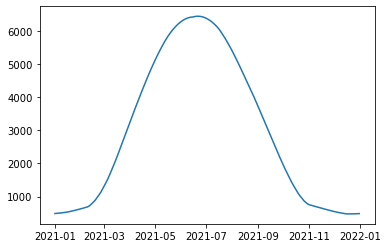

In [53]:
plt.plot(date,year_irradiance_tot)


In [58]:
solarposition.sun_rise_set_transit_spa(times_2,caracteristics['lat'],caracteristics['lon'])

[2021-01-01 00:00:00+02:00   0 days 09:20:25.030100480
00:00                                             NaT
01:00                                             NaT
02:00                                             NaT
03:00                                             NaT
04:00                                             NaT
05:00                                             NaT
06:00                                             NaT
07:00                                             NaT
08:00                                             NaT
09:00                                             NaT
10:00                                             NaT
11:00                                             NaT
12:00                                             NaT
13:00                                             NaT
14:00                                             NaT
15:00                                             NaT
16:00                                             NaT
17:00                      